In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Poisson Distribution

In [1]:
# Define the parameters of the poisson distribution
l=1e-3 # the probabily of a single event to appen in an interval dt
dt=1 # the interval dt
N=1e4 # the total number of intervals 
nu=l*dt*N # the actual poisson parameter

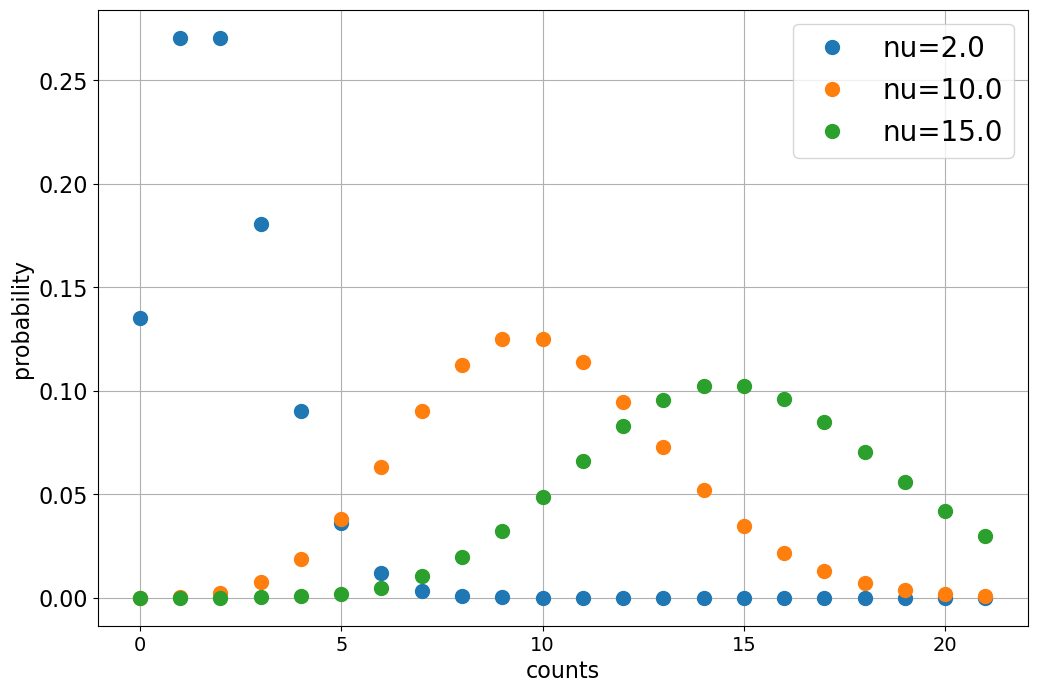

In [4]:
x = np.arange(0, 2*nu+2)    
    
plt.figure(figsize=(12,8))
for scale in [0.2,1,1.5]:
    plt.plot(x, poisson(nu*scale).pmf(x), 'o', markersize=10 , label='nu={}'.format(nu*scale))

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('probability', fontsize=16)
plt.xlabel('counts', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

In [5]:
np.sum(poisson(nu).pmf(x))

0.9993003494876674

## Run experiments, toss toys

In [6]:
def lcg(m=2**32, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# setting the seed
lcg.current = 12346

In [7]:
n_toys = 10000

data=[]
for i in range(n_toys):
    a=np.array([lcg() for i in range(int(N))])
    data.append(len(a[a<l*dt]))

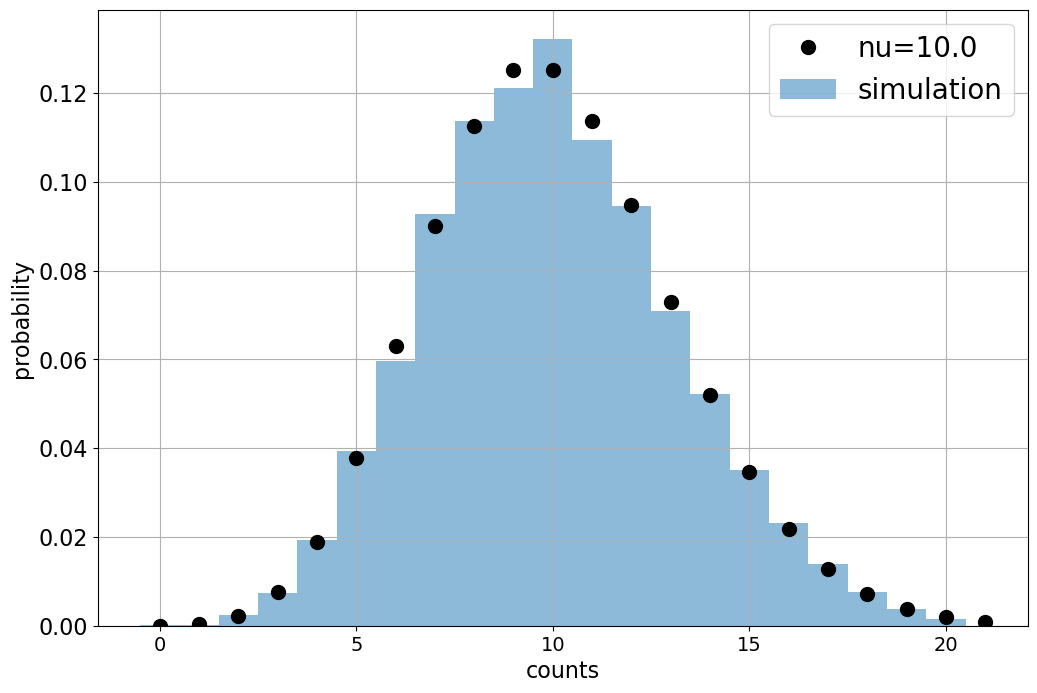

In [8]:
x = np.arange(0, 22)    
    
plt.figure(figsize=(12,8))
plt.plot(x, poisson(nu).pmf(x), 'ko', markersize=10 , label='nu={}'.format(nu))
plt.hist(data, bins=x-0.5, density=True, alpha=0.5, label='simulation')
plt.ylabel('probability', fontsize=16)
plt.xlabel('counts', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')


In [9]:
print ('Expected: Mean={}, Variance={}'.format(nu,nu))
print ('Computed: Mean={:.3f}, Variance={:.3f}'.format(np.mean(data),np.var(data)))

mean = np.sum(data)/len(data)
variance = np.sum([(d - mean) ** 2 for d in data])/len(data)

print ('Computed by hand: Mean={:.3f}, Variance={:.3f}'.format(mean,variance))

Expected: Mean=10.0, Variance=10.0
Computed: Mean=10.013, Variance=10.138
Computed by hand: Mean=10.013, Variance=10.138


### Poisson as approx of Binomial

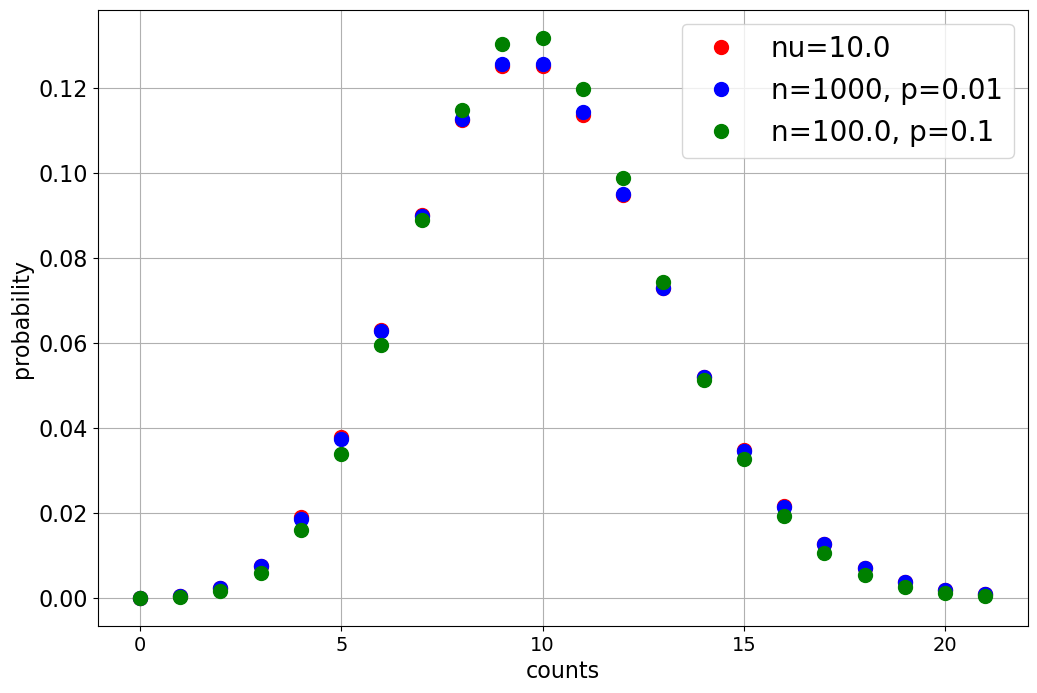

In [10]:
from scipy.stats import binom
n=1000
p=0.01
nu=n*p


plt.figure(figsize=(12,8))
plt.plot(x, poisson(nu).pmf(x), 'ro', markersize=10 , label='nu={}'.format(nu))
plt.plot(x, binom(n,p).pmf(x), 'bo', markersize=10 , label='n={}, p={}'.format(n,p))
plt.plot(x, binom(n/10,p*10).pmf(x), 'go', markersize=10 , label='n={}, p={}'.format(n/10,p*10))

plt.ylabel('probability', fontsize=16)
plt.xlabel('counts', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.legend(loc=0, fontsize=20)
plt.grid(axis = 'y')
plt.grid(axis = 'x')

#poisson(nu).pmf(x)-

# serve una metrica per calcolare la compatibilita'! (solito problema..)
